In [238]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv



In [212]:
# Take in WHO measles data and read it into pandas dataFrame
who_measles = "../Resources/02_WHO_measlescasesbycountrybymonth.csv"
who_measles_df = pd.read_csv(who_measles)

#Display DataFrame head
who_measles_df.head()

,Region,ISO3,Country,Year,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 16
0,AFR,AGO,Angola,2011,17.0,19.0,37.0,41.0,11.0,8.0,5.0,4.0,32.0,10.0,8.0,0.0,NaN
1,AFR,AGO,Angola,2012,373.0,289.0,381.0,393.0,546.0,357.0,382.0,553.0,571.0,367.0,216.0,42.0,NaN
2,AFR,AGO,Angola,2013,725.0,646.0,734.0,491.0,726.0,695.0,680.0,660.0,563.0,288.0,265.0,91.0,NaN
3,AFR,AGO,Angola,2014,1161.0,1101.0,1319.0,1094.0,1754.0,1150.0,1484.0,1429.0,1098.0,373.0,27.0,12.0,NaN
4,AFR,AGO,Angola,2015,4.0,15.0,0.0,0.0,3.0,3.0,4.0,13.0,40.0,14.0,5.0,2.0,NaN


In [240]:
# Clean data by deleting unnecesary columns in new DataFrame
who_cleaned_measles_df = who_measles_df.drop(who_measles_df.columns[[0, 1]], axis=1)
who_cleaned_measles_df.drop('Unnamed: 16', axis=1, inplace=True)

# Remove the data for the United States of America
who_cleaned_measles_df.drop(who_cleaned_measles_df.loc[who_cleaned_measles_df['Country']=='United States of America'].index, inplace=True)
world_measles_df = who_cleaned_measles_df

# Confirm that the total countries reduced to 193
len(world_measles_df["Country"].value_counts())

# # Display DataFrame head
# world_measles_df.head()

193

In [241]:
# Replace all NaN values with 0 
world_measles_df = world_measles_df.fillna(0)

# Create a new column called "Total" and add up each month's recorded cases to get the total for the year per country
world_measles_df["Total"] = who_cleaned_measles_df["January"] + who_cleaned_measles_df["February"] + who_cleaned_measles_df["March"] + who_cleaned_measles_df["April"] + who_cleaned_measles_df["May"] + who_cleaned_measles_df["June"] + who_cleaned_measles_df["July"] + who_cleaned_measles_df["August"] + who_cleaned_measles_df["September"] + who_cleaned_measles_df["October"] + who_cleaned_measles_df["November"] + who_cleaned_measles_df["December"]

# # Display the DataFrame head with the new column added
# world_measles_df.head()

In [242]:
# Obtain the total number of cases for each of the Years listed
world_total_cases = world_measles_df.groupby('Year').sum()

# # Display the DataFrame head
# world_total_cases.head()

In [243]:
# Reference the relevant columns and drop the others from within the DataFrame
total_cases_df = world_total_cases.drop(world_total_cases.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1)

# Display the DataFrame head
total_cases_df.head()

,Total
Year,
2011,153533.0
2012,115472.0
2013,179357.0
2014,292257.0
2015,251150.0


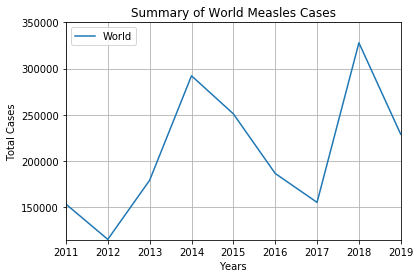

In [246]:
# Line graph with the total cases as the y axis; the years as the x axis
# Define the x axis:
who_x_axis = np.arange(2011, 2020, 1)
cases = [153533, 115472, 179357, 292257, 251150, 186709, 155450, 327926, 229023]

# Plot the line graph that will be used to track measles cases over the years (from 2011 to 2019)
plt.plot(who_x_axis, cases, label="World")

# Create a legend for the chart
plt.legend()

# Add in a grid for the chart
plt.grid()

# Print the chart to the screen (display it)
#plt.show()

# Add Title: Add labels to X and Y axes 
plt.title("Summary of World Measles Cases")
plt.xlabel("Years")
plt.ylabel("Total Cases")

# Set the limits for the X and Y axes
plt.xlim(2011,2019)
plt.ylim(115000,350000)

# Save the plot
plt.savefig('../Output/WHO_Worldwide_Measles.png')

In [255]:
# Sort the data frame in descending order to obtain the top 5 spender by names 
#top_5_spenders = top_spenders_df.sort_values(["Total Purchase Value"], ascending=False).head()
top_five_countries = world_measles_df.sort_values(["Total"], ascending=False).head()
top_five_countries.head

<bound method NDFrame.head of      Country  Year  January  February    March    April     May    June  \
1435   India  2015  11329.0   11331.0  11194.0  11214.0  7906.0  5416.0   
1434   India  2014   7268.0    7127.0   9345.0  11462.0  5908.0  3982.0   
1436   India  2016   9939.0   11584.0  14796.0   8926.0  5891.0  3754.0   
1438   India  2018   7619.0    7927.0  13114.0  11077.0  9933.0  4498.0   
1437   India  2017   5532.0    7023.0  10762.0   8377.0  5687.0  3377.0   

        July  August  September  October  November  December    Total  
1435  5069.0  4563.0     4248.0   3133.0    3058.0    4565.0  83026.0  
1434  3613.0  3403.0     5464.0   6644.0    7547.0    8543.0  80306.0  
1436  1687.0  2536.0     2172.0   2711.0    3700.0    3102.0  70798.0  
1438  2791.0  3053.0     2274.0   2593.0    1930.0    2582.0  69391.0  
1437  2635.0  3254.0     2965.0   2645.0    4395.0    4636.0  61288.0  >

In [ ]:
# Obtain the total number of cases for each of the Years listed
world_total_cases = world_measles_df.groupby('Year').sum()

# # Display the DataFrame head
# world_total_cases.head()

In [257]:
top_five_countries["Country"].value_counts()

India    5
Name: Country, dtype: int64

In [272]:
top = world_measles_df.groupby('Country').sum()
top

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
Country,,,,,,,,,,,,,,
Afghanistan,18135,1196.0,1472.0,1656.0,1388.0,1258.0,1007.0,767.0,275.0,196.0,265.0,290.0,598.0,10273.0
Albania,18135,136.0,228.0,483.0,469.0,245.0,134.0,45.0,13.0,18.0,23.0,39.0,30.0,1478.0
Algeria,18135,149.0,225.0,92.0,42.0,102.0,77.0,12.0,5.0,2.0,25.0,52.0,29.0,812.0
Andorra,18135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,18135,2407.0,2178.0,2762.0,3023.0,4381.0,2222.0,2565.0,2679.0,2315.0,1058.0,535.0,161.0,23466.0
Antigua and Barbuda,18135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,18135,1.0,3.0,5.0,4.0,2.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0,24.0
Armenia,18135,0.0,4.0,16.0,1.0,11.0,21.0,12.0,11.0,2.0,1.0,0.0,2.0,77.0
Australia,18135,158.0,147.0,198.0,97.0,66.0,71.0,91.0,132.0,121.0,106.0,83.0,78.0,1240.0


In [276]:
#top_five = top(["Total"].value_counts

top_five = top.sort_values(["Total"], ascending=False).head()
top_five

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
Country,,,,,,,,,,,,,,
India,18135,45239.0,49470.0,64044.0,55595.0,35325.0,21027.0,15795.0,16809.0,17123.0,17726.0,20630.0,23428.0,364809.0
China,18135,10202.0,16772.0,27505.0,33149.0,29479.0,19481.0,13209.0,8512.0,4342.0,3388.0,3744.0,6189.0,174936.0
Nigeria,18135,21572.0,31794.0,40304.0,24242.0,11894.0,5802.0,3916.0,3924.0,3383.0,3423.0,3546.0,2629.0,135905.0
Philippines,18135,24571.0,22899.0,17894.0,10811.0,6017.0,4891.0,4836.0,4935.0,4421.0,3938.0,4878.0,4220.0,92562.0
Indonesia,18135,12294.0,10566.0,9905.0,9922.0,8536.0,7108.0,5929.0,5015.0,5518.0,6068.0,5388.0,4292.0,90078.0


TypeError: unhashable type: 'list'